# Inverse problem
known: all data, but noisy  
unknown: k8, ka, k5, h5  
results record: https://outlookuga-my.sharepoint.com/:x:/r/personal/yq88347_uga_edu/_layouts/15/Doc.aspx?sourcedoc=%7Be6449b96-7895-43ff-a1e4-42fc2118f900%7D&action=editnew

In [1]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

import tensorflow as tf
import models_tf as models

In [2]:
# generate Gaussian noise
noise_mean = 0
noise_scale = 0.20
num_of_points = 2000
noise = np.random.normal(noise_mean, noise_scale, num_of_points)

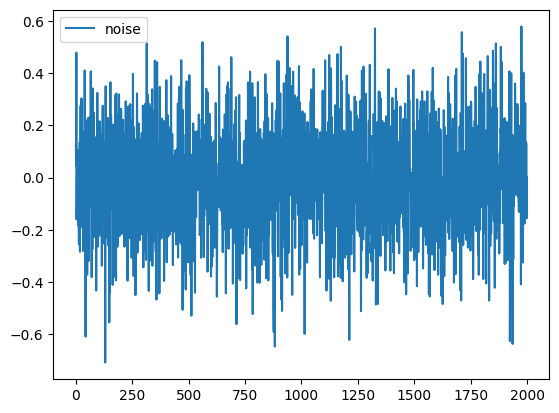

In [3]:
plt.figure(dpi=100)
plt.plot(noise, "-", label="noise")
plt.legend()
plt.show()

In [4]:
data = sio.loadmat("../../data/data_2k_points.mat")
c0 = data["IC"]
t = data["t"]
c_ref = data["y"]

t_train = t

scale = np.array(
    [10, 1, 100, 100, 0.0001, 10, 0.1, 1000]
).reshape([-1])
c_ref = c_ref / scale
c0 = c0 / scale

In [5]:
c_original = data["y"] / scale

# add noise to 8 factors
for i in range(0, 8):
    c_ref[:, i] = np.add(c_ref[:, i], np.multiply(c_ref[:, i], noise))

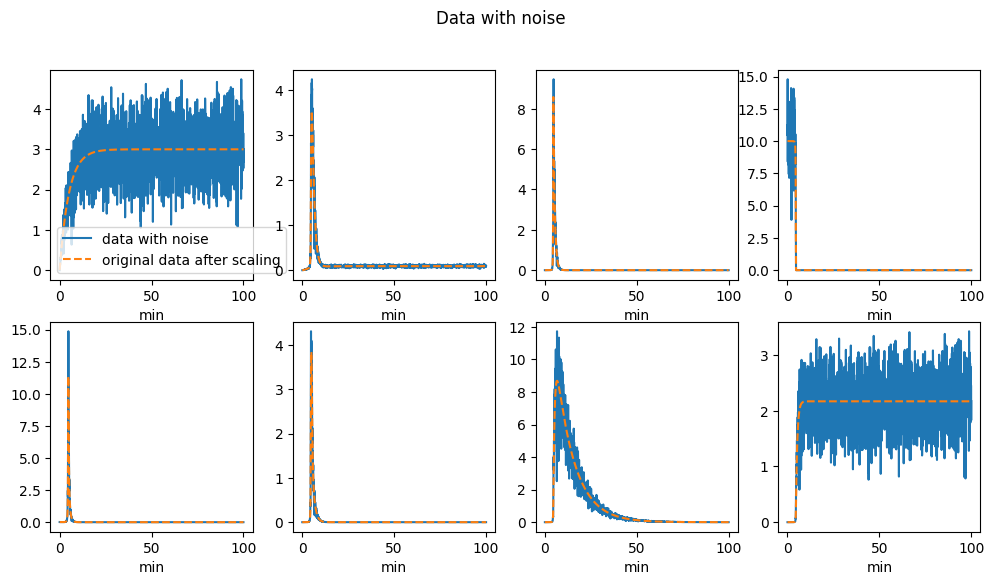

In [6]:
# plt.figure(dpi=100)
plt.figure(figsize=(12, 6), dpi=100)
plt.subplot(2, 4, 1)
plt.plot(t_train, c_ref[:, 0:1], "-", label="data with noise")
plt.plot(t_train, c_original[:, 0:1], "--", label="original data after scaling")
plt.xlabel("min")
plt.legend()

# plt.figure(dpi=100)
plt.subplot(2, 4, 2)
plt.plot(t_train, c_ref[:, 1:2], "-", label="data with noise")
plt.plot(t_train, c_original[:, 1:2], "--", label="original data after scaling")
plt.xlabel("min")
# plt.legend()

# plt.figure(dpi=100)
plt.subplot(2, 4, 3)
plt.plot(t_train, c_ref[:, 2:3], "-", label="data with noise")
plt.plot(t_train, c_original[:, 2:3], "--", label="original data after scaling")
plt.xlabel("min")
# plt.legend()

# plt.figure(dpi=100)
plt.subplot(2, 4, 4)
plt.plot(t_train, c_ref[:, 3:4], "-", label="data with noise")
plt.plot(t_train, c_original[:, 3:4], "--", label="original data after scaling")
plt.xlabel("min")
# plt.legend()

# plt.figure(dpi=100)
plt.subplot(2, 4, 5)
plt.plot(t_train, c_ref[:, 4:5], "-", label="data with noise")
plt.plot(t_train, c_original[:, 4:5], "--", label="original data after scaling")
plt.xlabel("min")
# plt.legend()

# plt.figure(dpi=100)
plt.subplot(2, 4, 6)
plt.plot(t_train, c_ref[:, 5:6], "-", label="data with noise")
plt.plot(t_train, c_original[:, 5:6], "--", label="original data after scaling")
plt.xlabel("min")
# plt.legend()

# plt.figure(dpi=100)
plt.subplot(2, 4, 7)
plt.plot(t_train, c_ref[:, 6:7], "-", label="data with noise")
plt.plot(t_train, c_original[:, 6:7], "--", label="original data after scaling")
plt.xlabel("min")
# plt.legend()

# plt.figure(dpi=100)
plt.subplot(2, 4, 8)
plt.plot(t_train, c_ref[:, 7:8], "-", label="data with noise")
plt.plot(t_train, c_original[:, 7:8], "--", label="original data after scaling")
plt.xlabel("min")
# plt.legend()

plt.suptitle("Data with noise")
plt.show()

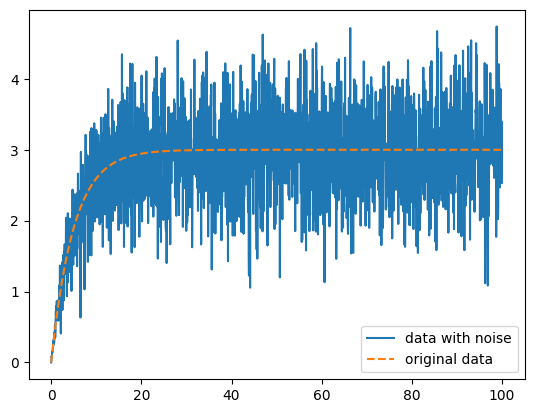

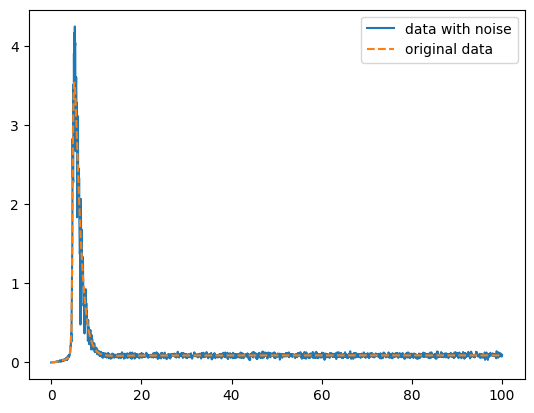

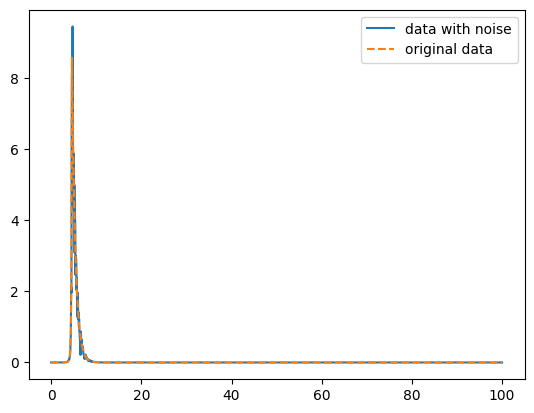

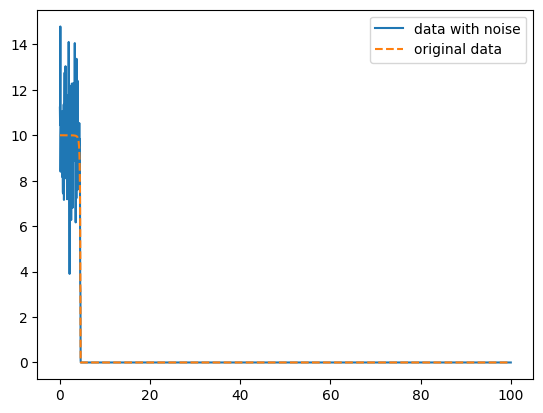

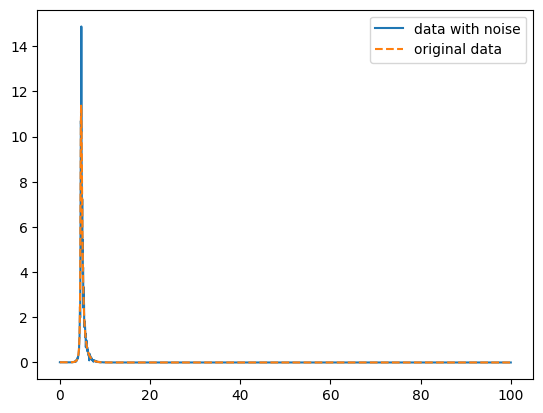

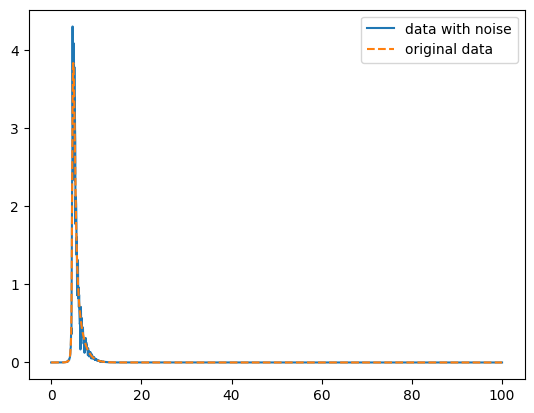

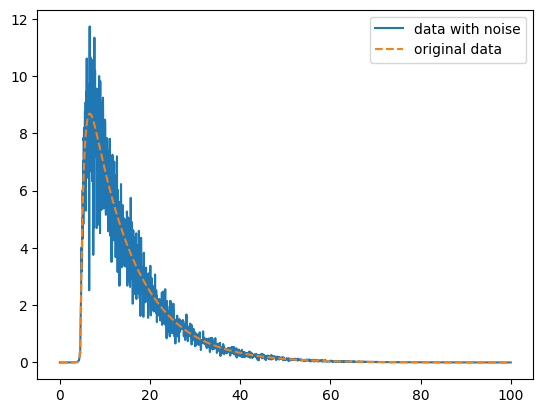

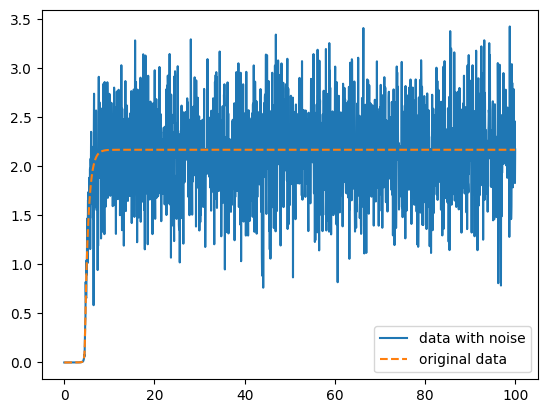

In [7]:
plt.figure(dpi=100)
plt.plot(t_train, c_ref[:, 0:1], "-", label="data with noise")
plt.plot(t_train, c_original[:, 0:1], "--", label="original data")
plt.legend()
plt.show()

plt.figure(dpi=100)
plt.plot(t_train, c_ref[:, 1:2], "-", label="data with noise")
plt.plot(t_train, c_original[:, 1:2], "--", label="original data")
plt.legend()
plt.show()

plt.figure(dpi=100)
plt.plot(t_train, c_ref[:, 2:3], "-", label="data with noise")
plt.plot(t_train, c_original[:, 2:3], "--", label="original data")
plt.legend()
plt.show()

plt.figure(dpi=100)
plt.plot(t_train, c_ref[:, 3:4], "-", label="data with noise")
plt.plot(t_train, c_original[:, 3:4], "--", label="original data")
plt.legend()
plt.show()

plt.figure(dpi=100)
plt.plot(t_train, c_ref[:, 4:5], "-", label="data with noise")
plt.plot(t_train, c_original[:, 4:5], "--", label="original data")
plt.legend()
plt.show()

plt.figure(dpi=100)
plt.plot(t_train, c_ref[:, 5:6], "-", label="data with noise")
plt.plot(t_train, c_original[:, 5:6], "--", label="original data")
plt.legend()
plt.show()

plt.figure(dpi=100)
plt.plot(t_train, c_ref[:, 6:7], "-", label="data with noise")
plt.plot(t_train, c_original[:, 6:7], "--", label="original data")
plt.legend()
plt.show()

plt.figure(dpi=100)
plt.plot(t_train, c_ref[:, 7:8], "-", label="data with noise")
plt.plot(t_train, c_original[:, 7:8], "--", label="original data")
plt.legend()
plt.show()

In [8]:
np.max(t)

100.0

In [9]:
len(t)

2000

In [10]:
np.max(data["y"], axis=0)

array([2.99999999e+01, 3.54115121e+00, 8.57923329e+02, 1.00000000e+03,
       1.13698673e-03, 3.83874944e+01, 8.68819961e-01, 2.16923077e+03])

In [11]:
model = models.PINN(
    c0=c0,
    output_dim=8,
    scale=scale,
    units=100, 
    activation=tf.tanh,
    eps=1e-5,
)

eps:  tf.Tensor(1e-05, shape=(), dtype=float32)


In [12]:
# t_ode = t_train[::10]
# t_u = t_train
# u = c_ref
t_ode = t_train[:201]
t_u = t_train
u = c_ref
loss, ode_loss, data_loss, min_loss, h5_list = model.train(t_ode, t_u, u, niter=300000)

0 17.302069 1300666.5 4.2954044 129939230000.0 12.7422905 1.0009898
10000 0.1582828 107.95347 0.15720327 669550.9 1.0125796 0.004670532
20000 0.11755892 147.75024 0.11608142 11495437.0 0.32795882 0.044421114
30000 0.10168786 3.2617311 0.101655245 44957.18 0.028121592 1.6467134
40000 0.09469712 5.3524337 0.09464359 237.25746 0.053500608 1.2032918
50000 0.0922424 4.363565 0.09219876 71.74059 0.043628473 1.9104172
60000 0.09013327 3.4185476 0.09009909 118.017105 0.034173675 1.7272127
70000 0.08391919 2.7537544 0.08389165 75.61112 0.027529985 2.9441717
80000 0.08184397 3.330728 0.08181067 71.78434 0.0333001 2.0132942
90000 0.079950474 1.6055079 0.07993442 111.702545 0.016043909 1.4957111
100000 0.08174331 5.7934623 0.08168537 167.3074 0.05791789 2.1030445
110000 0.078252696 3.4519773 0.07821818 156.67732 0.034504104 1.6691476
120000 0.076066434 1.6230125 0.07605021 172.63663 0.016212862 1.4183278
130000 0.08226567 5.121758 0.08221445 155.29352 0.05120205 2.0240457
140000 0.0765953 3.170773

In [13]:
min_loss

0.06926958

In [14]:
model.restore()
c_pred = model.call(
    tf.constant(t_train, tf.float32),
)

In [15]:
L2 = np.sqrt(np.sum((c_pred - c_ref) ** 2, axis=0) / np.sum(c_ref ** 2, axis=0))

In [16]:
L2

array([0.18541261, 0.1169836 , 0.07253543, 0.09170387, 0.0497545 ,
       0.13900382, 0.10420767, 0.18410556])

In [17]:
# ka = 1.2
print(tf.math.exp(model.log_ka))

tf.Tensor(0.70371425, shape=(), dtype=float32)


In [18]:
# k8 = 0.00001
print(tf.math.exp(model.log_k8))

tf.Tensor(7.684786e-06, shape=(), dtype=float32)


In [19]:
# k5 = 0.17
print(tf.math.exp(model.log_k5))

tf.Tensor(0.23953381, shape=(), dtype=float32)


In [20]:
# h5 = 0.31
print(tf.math.exp(model.log_h5))

tf.Tensor(2.3464825, shape=(), dtype=float32)


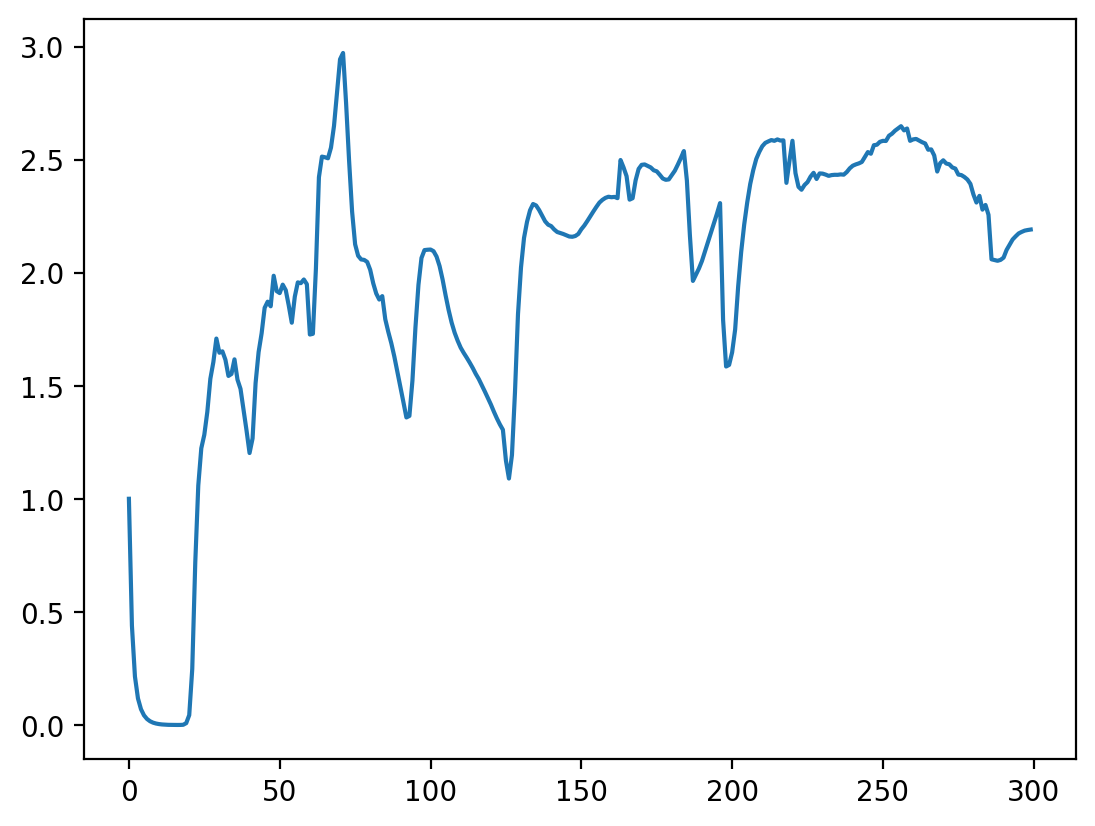

In [21]:
plt.figure(dpi=200)
plt.plot(h5_list[::1000], "-", label="reference")
# plt.plot(np.log(loss)[::1000], "-", label="reference")
plt.show()

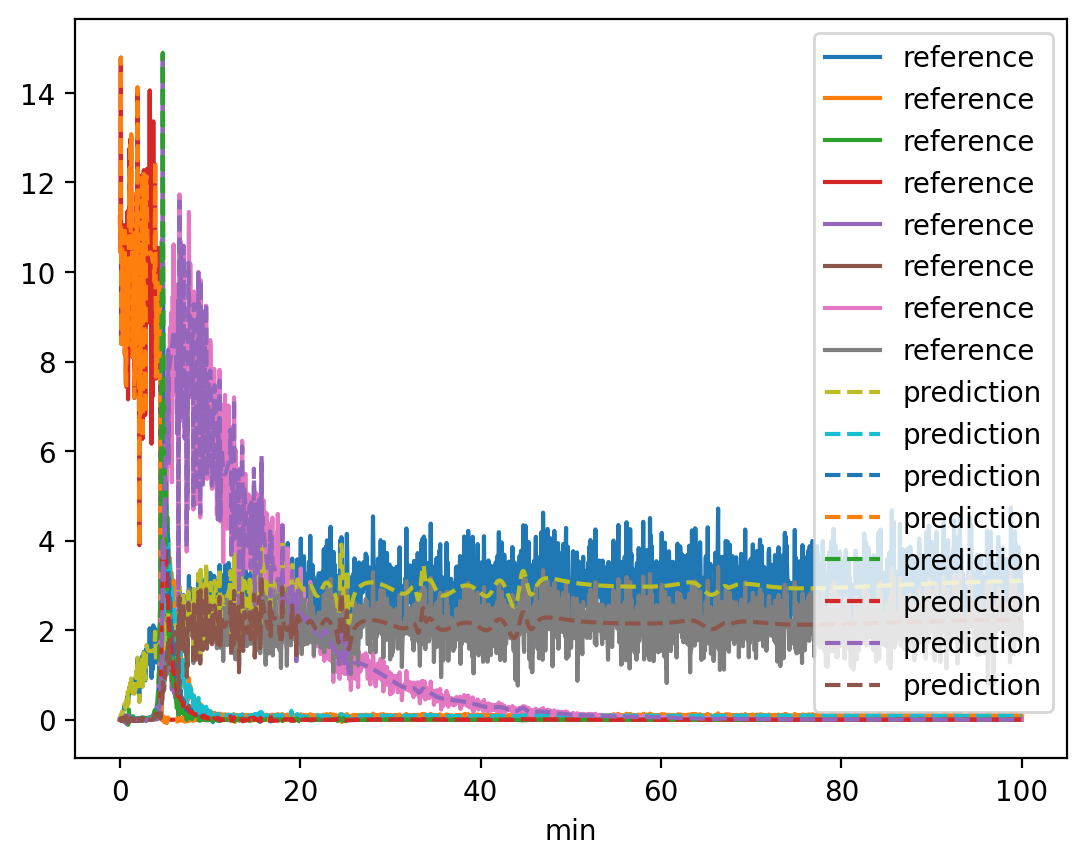

In [22]:
plt.figure(dpi=200)
plt.plot(t_train, c_ref, "-", label="reference")
# plt.plot(t_train, y_train, '.', label="train")
plt.plot(t_train, c_pred, "--", label="prediction")
plt.xlabel("min")
plt.legend()
plt.show()

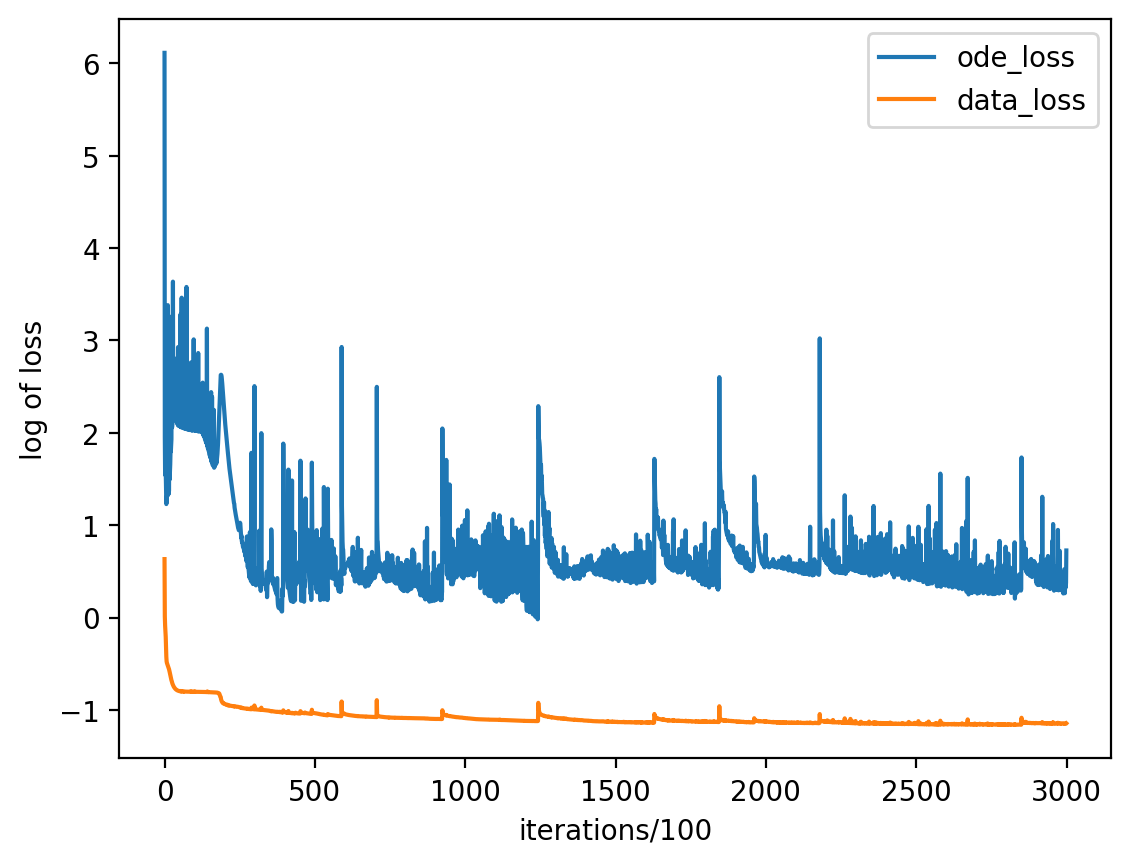

In [23]:
plt.figure(dpi=200)
plt.plot(np.log10(ode_loss)[::100], "-", label="ode_loss")
plt.plot(np.log10(data_loss)[::100], "-", label="data_loss")
# plt.plot(np.log(loss), "-", label="loss")
plt.xlabel('iterations/100')
plt.ylabel('log of loss')
plt.legend()
plt.show()

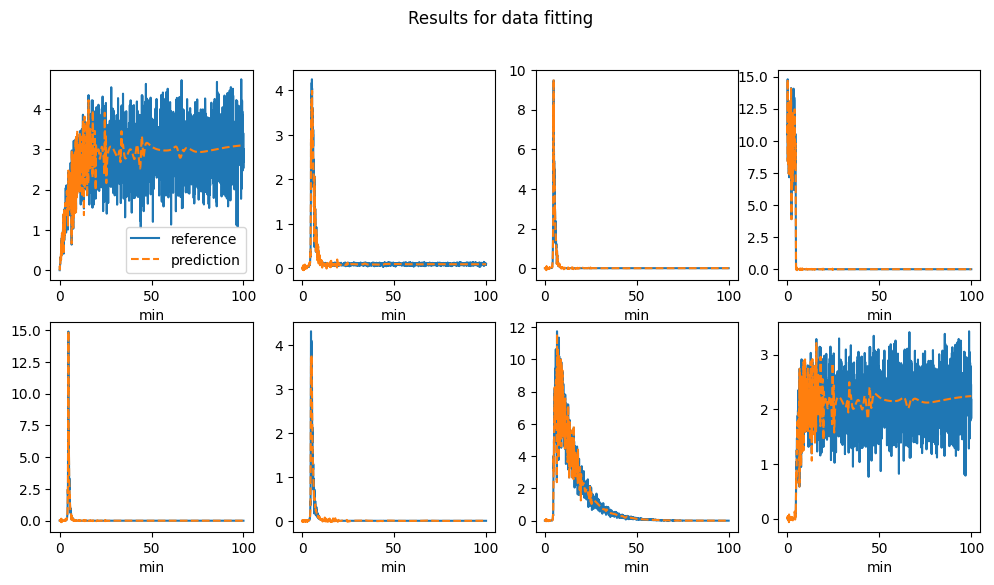

In [24]:
# plt.figure(dpi=100)
plt.figure(figsize=(12, 6), dpi=100)
plt.subplot(2, 4, 1)
plt.plot(t_train, c_ref[:, 0:1], "-", label="reference")
plt.plot(t_train, c_pred[:, 0:1], "--", label="prediction")
plt.xlabel("min")
plt.legend()

# plt.figure(dpi=100)
plt.subplot(2, 4, 2)
plt.plot(t_train, c_ref[:, 1:2], "-", label="reference")
plt.plot(t_train, c_pred[:, 1:2], "--", label="prediction")
plt.xlabel("min")
# plt.legend()

# plt.figure(dpi=100)
plt.subplot(2, 4, 3)
plt.plot(t_train, c_ref[:, 2:3], "-", label="reference")
plt.plot(t_train, c_pred[:, 2:3], "--", label="prediction")
plt.xlabel("min")
# plt.legend()

# plt.figure(dpi=100)
plt.subplot(2, 4, 4)
plt.plot(t_train, c_ref[:, 3:4], "-", label="reference")
plt.plot(t_train, c_pred[:, 3:4], "--", label="prediction")
plt.xlabel("min")
# plt.legend()

# plt.figure(dpi=100)
plt.subplot(2, 4, 5)
plt.plot(t_train, c_ref[:, 4:5], "-", label="reference")
plt.plot(t_train, c_pred[:, 4:5], "--", label="prediction")
plt.xlabel("min")
# plt.legend()

# plt.figure(dpi=100)
plt.subplot(2, 4, 6)
plt.plot(t_train, c_ref[:, 5:6], "-", label="reference")
plt.plot(t_train, c_pred[:, 5:6], "--", label="prediction")
plt.xlabel("min")
# plt.legend()

# plt.figure(dpi=100)
plt.subplot(2, 4, 7)
plt.plot(t_train, c_ref[:, 6:7], "-", label="reference")
plt.plot(t_train, c_pred[:, 6:7], "--", label="prediction")
plt.xlabel("min")
# plt.legend()

# plt.figure(dpi=100)
plt.subplot(2, 4, 8)
plt.plot(t_train, c_ref[:, 7:8], "-", label="reference")
plt.plot(t_train, c_pred[:, 7:8], "--", label="prediction")
plt.xlabel("min")
# plt.legend()

plt.suptitle("Results for data fitting")
plt.show()

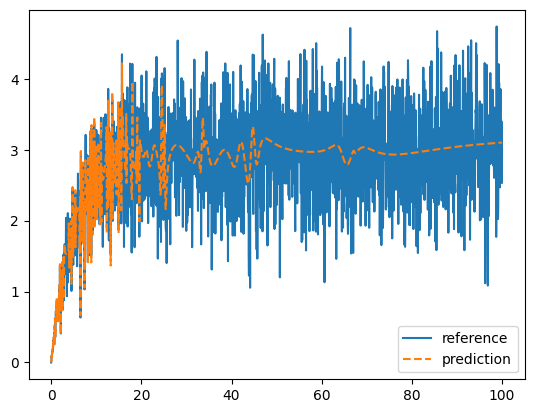

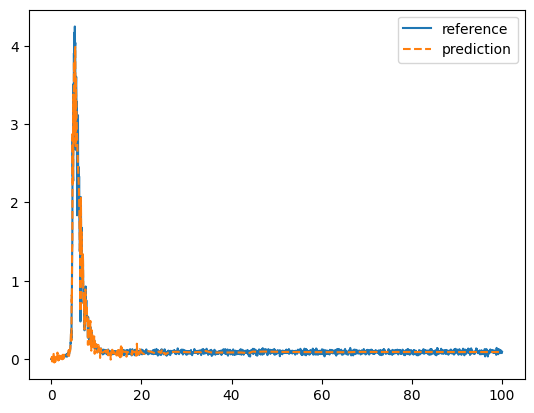

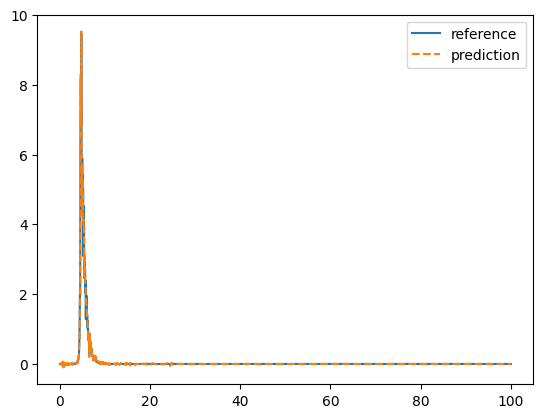

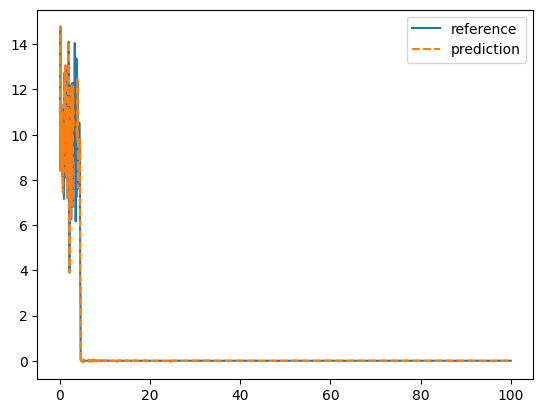

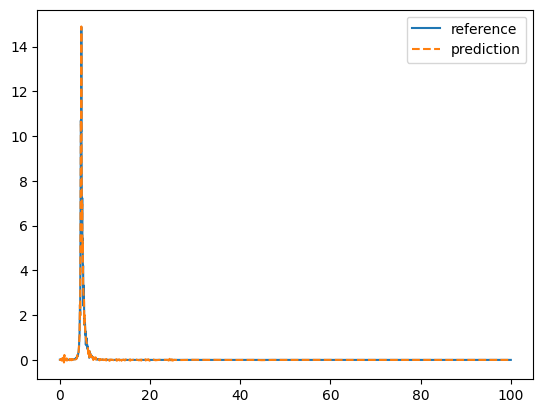

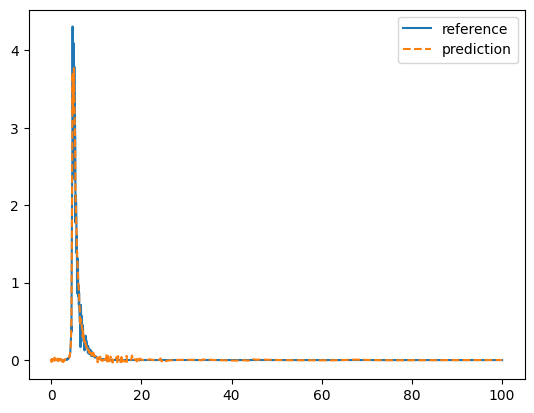

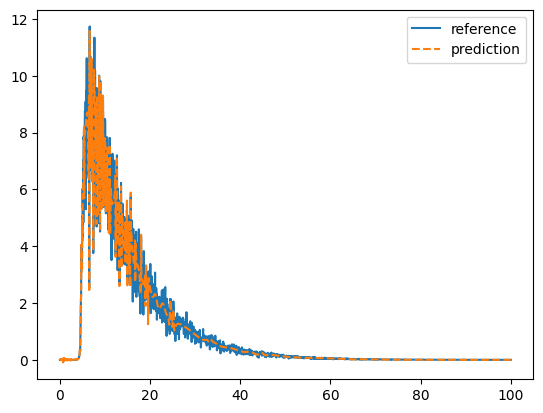

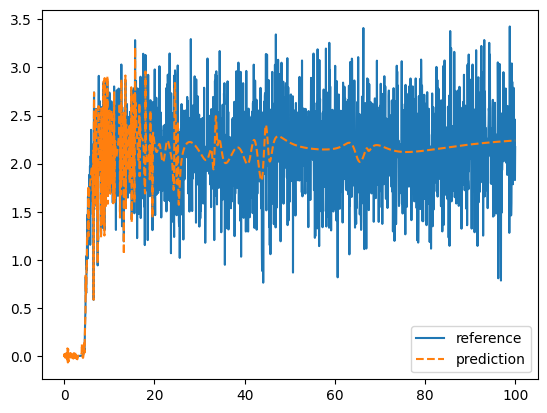

In [25]:
plt.figure(dpi=100)
plt.plot(t_train, c_ref[:, 0:1], "-", label="reference")
plt.plot(t_train, c_pred[:, 0:1], "--", label="prediction")
plt.legend()
plt.show()

plt.figure(dpi=100)
plt.plot(t_train, c_ref[:, 1:2], "-", label="reference")
plt.plot(t_train, c_pred[:, 1:2], "--", label="prediction")
plt.legend()
plt.show()

plt.figure(dpi=100)
plt.plot(t_train, c_ref[:, 2:3], "-", label="reference")
plt.plot(t_train, c_pred[:, 2:3], "--", label="prediction")
plt.legend()
plt.show()

plt.figure(dpi=100)
plt.plot(t_train, c_ref[:, 3:4], "-", label="reference")
plt.plot(t_train, c_pred[:, 3:4], "--", label="prediction")
plt.legend()
plt.show()

plt.figure(dpi=100)
plt.plot(t_train, c_ref[:, 4:5], "-", label="reference")
plt.plot(t_train, c_pred[:, 4:5], "--", label="prediction")
plt.legend()
plt.show()

plt.figure(dpi=100)
plt.plot(t_train, c_ref[:, 5:6], "-", label="reference")
plt.plot(t_train, c_pred[:, 5:6], "--", label="prediction")
plt.legend()
plt.show()

plt.figure(dpi=100)
plt.plot(t_train, c_ref[:, 6:7], "-", label="reference")
plt.plot(t_train, c_pred[:, 6:7], "--", label="prediction")
plt.legend()
plt.show()

plt.figure(dpi=100)
plt.plot(t_train, c_ref[:, 7:8], "-", label="reference")
plt.plot(t_train, c_pred[:, 7:8], "--", label="prediction")
plt.legend()
plt.show()

In [2]:
def read_res(ref_value, index_in_res, file_path, num_of_lines=10):
    ref = [ref_value] * num_of_lines
    inf = []
    f = open(file_path + "res_1.txt", "r")
    results = f.read().split('\n')[:num_of_lines]
    for res in results:
        res = res.split(',')
        inf.append(float(res[index_in_res]))
    f.close()
    err_1 = np.divide(np.abs(np.subtract(inf, ref)), ref)

    inf = []
    f = open(file_path + "res_2.txt", "r")
    results = f.read().split('\n')[:num_of_lines]
    for res in results:
        res = res.split(',')
        inf.append(float(res[index_in_res]))
    f.close()
    err_2 = np.divide(np.abs(np.subtract(inf, ref)), ref)

    inf = []
    f = open(file_path + "res_3.txt", "r")
    results = f.read().split('\n')[:num_of_lines]
    for res in results:
        res = res.split(',')
        inf.append(float(res[index_in_res]))
    f.close()
    err_3 = np.divide(np.abs(np.subtract(inf, ref)), ref)

    inf = []
    f = open(file_path + "res_4.txt", "r")
    results = f.read().split('\n')[:num_of_lines]
    for res in results:
        res = res.split(',')
        inf.append(float(res[index_in_res]))
    f.close()
    err_4 = np.divide(np.abs(np.subtract(inf, ref)), ref)

    inf = []
    f = open(file_path + "res_5.txt", "r")
    results = f.read().split('\n')[:num_of_lines]
    for res in results:
        res = res.split(',')
        inf.append(float(res[index_in_res]))
    f.close()
    err_5 = np.divide(np.abs(np.subtract(inf, ref)), ref)

    inf = []
    f = open(file_path + "res_6.txt", "r")
    results = f.read().split('\n')[:num_of_lines]
    for res in results:
        res = res.split(',')
        inf.append(float(res[index_in_res]))
    f.close()
    err_6 = np.divide(np.abs(np.subtract(inf, ref)), ref)

    inf = []
    f = open(file_path + "res_7.txt", "r")
    results = f.read().split('\n')[:num_of_lines]
    for res in results:
        res = res.split(',')
        inf.append(float(res[index_in_res]))
    f.close()
    err_7 = np.divide(np.abs(np.subtract(inf, ref)), ref)
    
    print(err_7)
    print(err_6)
    print(err_5)
    print(err_4)
    print(err_3)
    print(err_2)
    print(err_1)
    
    # return [err_7, err_6, err_5, err_4, err_3, err_2, err_1]
    return [err_7, err_6, err_5, err_4, err_3, err_2]

[1.51125000e-03 1.11941667e-03 7.14916667e-04 1.10558333e-03
 1.78858333e-03 1.33783333e-03 9.07833333e-04 4.38333333e-05
 5.54833333e-04 5.36583333e-04]
[3.08083333e-04 1.89450000e-03 1.00366667e-03 2.12208333e-03
 5.99083333e-04 1.87016667e-03 1.40325000e-03 6.83416667e-04
 1.40941667e-03 4.73333333e-05]
[0.0004075  0.00030708 0.00073933 0.0001905  0.00038192 0.00049558
 0.00013058 0.00019258 0.00066558 0.00126583]
[0.00024892 0.00082975 0.00268867 0.0011     0.00146892 0.00104717
 0.00197017 0.00241275 0.00046292 0.00044708]
[0.00067983 0.00121358 0.00152858 0.00084725 0.00238533 0.00167808
 0.00011542 0.00053208 0.00015583 0.00087317]
[7.77108333e-03 2.78716667e-03 6.96666667e-04 5.86625000e-03
 3.26166667e-03 2.87108333e-03 4.47500000e-05 4.24933333e-03
 5.73166667e-03 5.10833333e-04]
[0.07456117 0.08150433 0.00069792 0.01542217 0.09580583 0.008515
 0.05450283 0.06210133 0.00362817 0.00107242]
[0.0182195 0.0017298 0.034756  0.0107466 0.0183468 0.0201715 0.000177
 0.0247471 0.01004

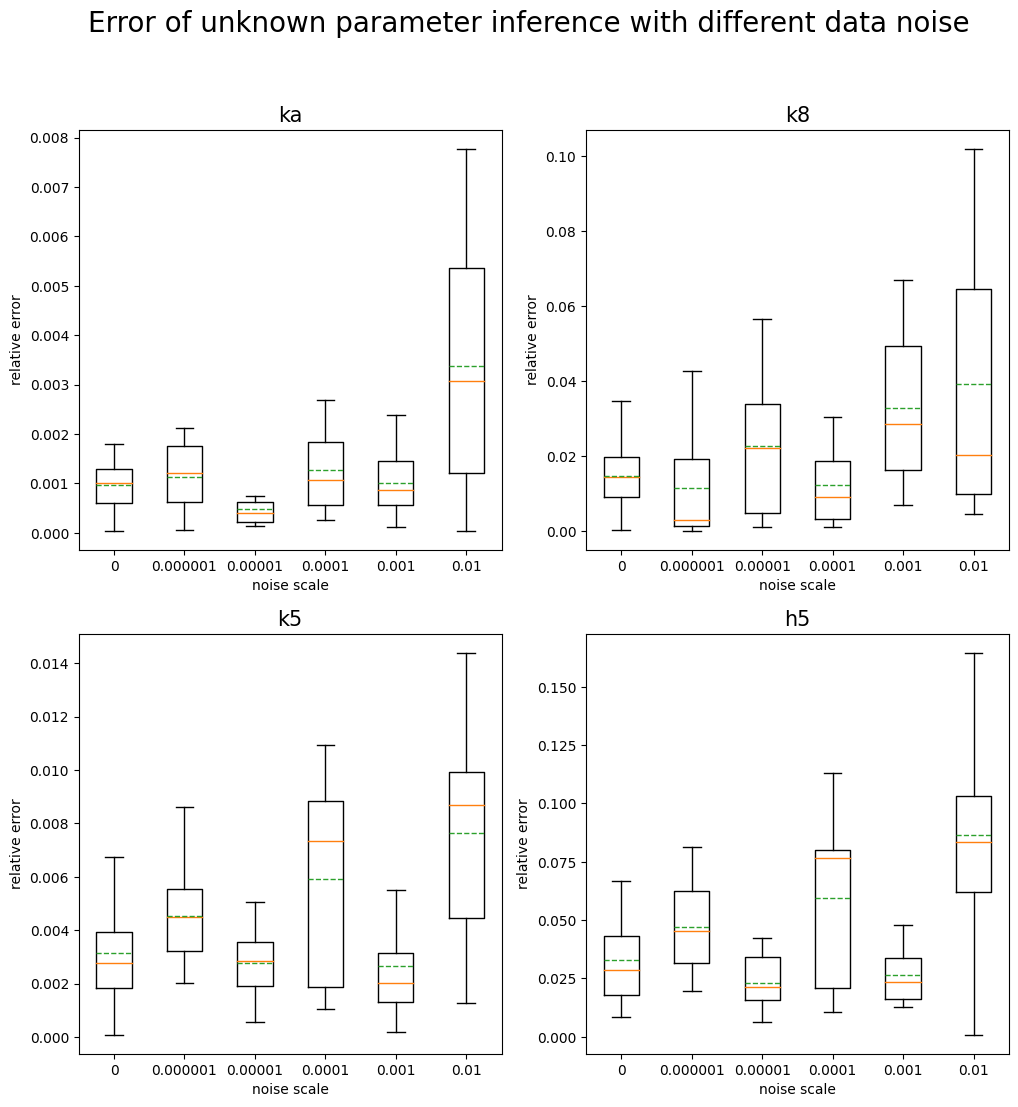

In [3]:
label=['0', '0.000001', '0.00001', '0.0001', '0.001', '0.01', '0.1']

ka_err = read_res(1.2, 0, "results/0424/")
plt.figure(figsize=(12, 12), dpi=100)
plt.subplot(2, 2, 1)
plt.boxplot(ka_err, labels=label[:6], showmeans=True, meanline=True, showfliers=False)
plt.xlabel("noise scale")
plt.ylabel("relative error")
plt.title("ka", size=15)

k8_err = read_res(0.00001, 1, "results/0424/")
plt.subplot(2, 2, 2)
plt.boxplot(k8_err, labels=label[:6], showmeans=True, meanline=True, showfliers=False)
plt.xlabel("noise scale")
plt.ylabel("relative error")
plt.title("k8", size=15)

k5_err = read_res(0.17, 2, "results/0424/")
plt.subplot(2, 2, 3)
plt.boxplot(k5_err, labels=label[:6], showmeans=True, meanline=True, showfliers=False)
plt.xlabel("noise scale")
plt.ylabel("relative error")
plt.title("k5", size=15)

h5_err = read_res(0.31, 3, "results/0424/")
plt.subplot(2, 2, 4)
plt.boxplot(h5_err, labels=label[:6], showmeans=True, meanline=True, showfliers=False)
plt.xlabel("noise scale")
plt.ylabel("relative error")
plt.title("h5", size=15)

plt.suptitle("Error of unknown parameter inference with different data noise", size=20)
plt.show()

In [28]:
# res = {
#     "t": t_train,
#     "ref": c_ref,
#     "pred": c_pred.numpy()
# }
# sio.savemat("./noise_20_res.mat", res)

In [30]:
res00 = sio.loadmat("./noise_00_res.mat")
res01 = sio.loadmat("./noise_01_res.mat")
res05 = sio.loadmat("./noise_05_res.mat")
res10 = sio.loadmat("./noise_10_res.mat")
res20 = sio.loadmat("./noise_20_res.mat")

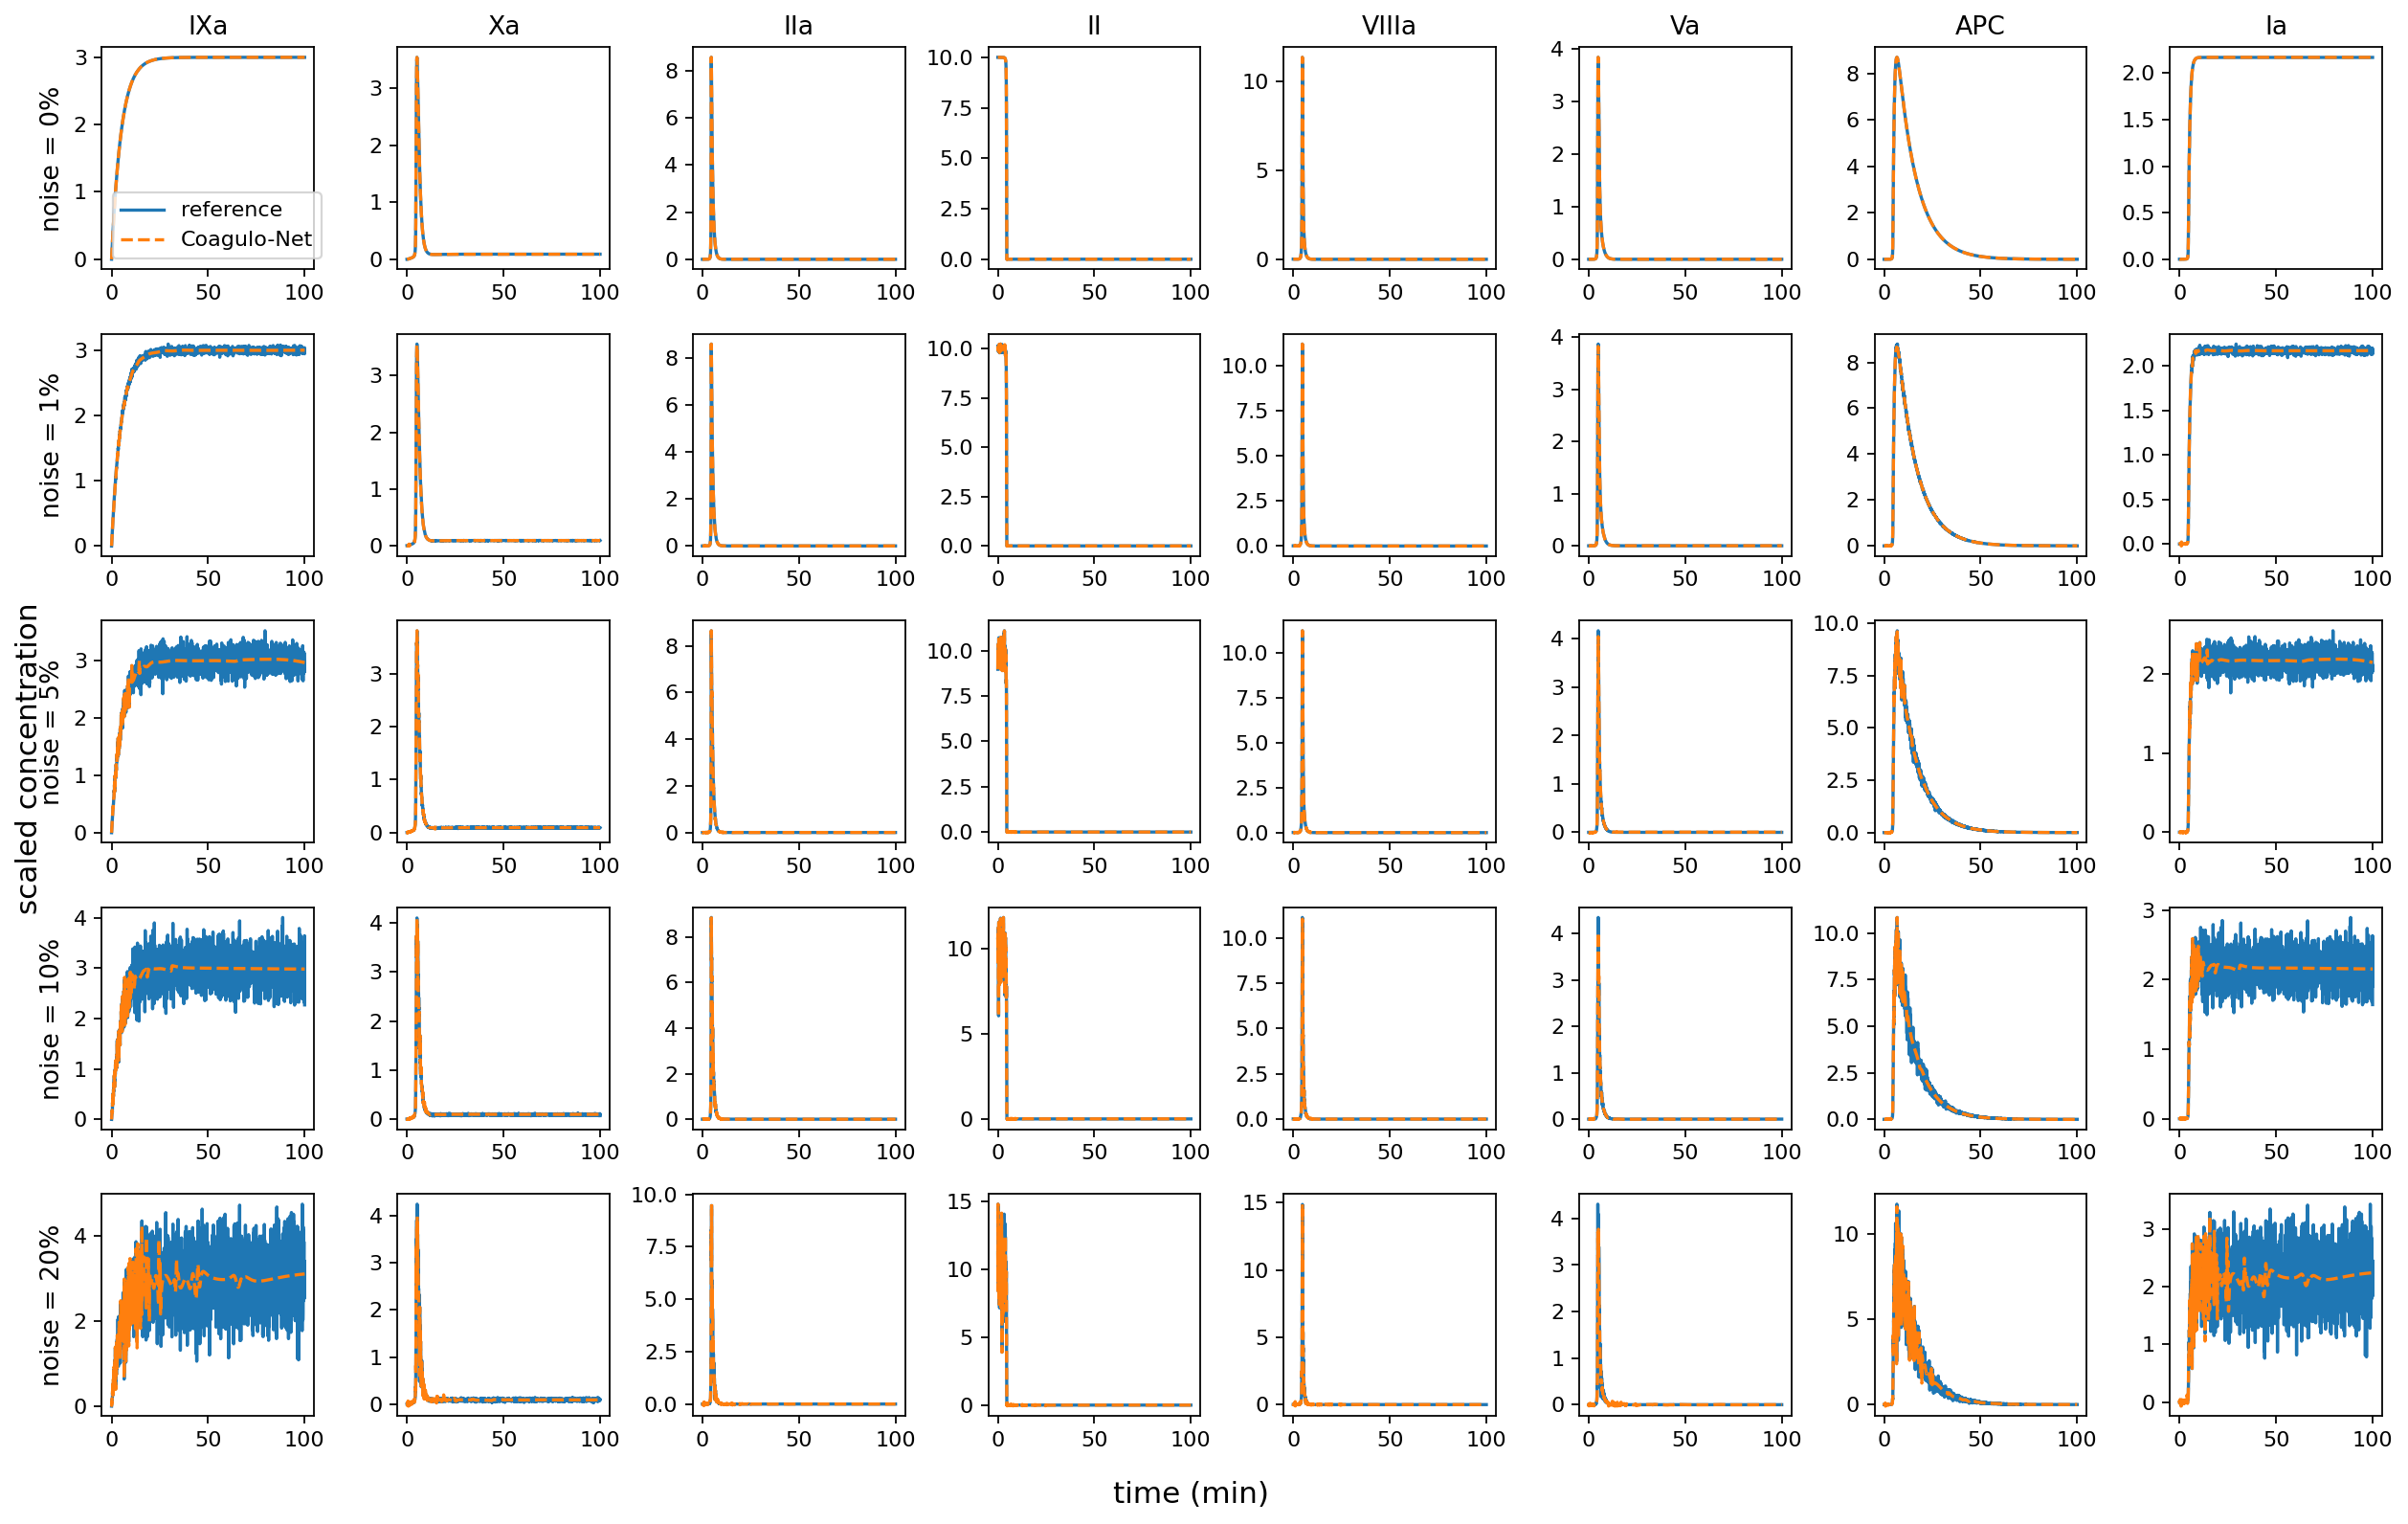

In [33]:
fig = plt.figure(figsize=(16, 10), dpi=160)
plt.subplot(5, 8, 1)
plt.plot(res00["t"], res00["ref"][:, 0:1], "-", label="reference")
plt.plot(res00["t"], res00["pred"][:, 0:1], "--", label="Coagulo-Net")
plt.legend()
plt.ylabel("noise = 0%", fontsize=12)
plt.title("IXa")

plt.subplot(5, 8, 2)
plt.plot(res00["t"], res00["ref"][:, 1:2], "-", label="reference")
plt.plot(res00["t"], res00["pred"][:, 1:2], "--", label="prediction")
plt.title("Xa")

plt.subplot(5, 8, 3)
plt.plot(res00["t"], res00["ref"][:, 2:3], "-", label="reference")
plt.plot(res00["t"], res00["pred"][:, 2:3], "--", label="prediction")
plt.title("IIa")

plt.subplot(5, 8, 4)
plt.plot(res00["t"], res00["ref"][:, 3:4], "-", label="reference")
plt.plot(res00["t"], res00["pred"][:, 3:4], "--", label="prediction")
plt.title("II")

plt.subplot(5, 8, 5)
plt.plot(res00["t"], res00["ref"][:, 4:5], "-", label="reference")
plt.plot(res00["t"], res00["pred"][:, 4:5], "--", label="prediction")
plt.title("VIIIa")

plt.subplot(5, 8, 6)
plt.plot(res00["t"], res00["ref"][:, 5:6], "-", label="reference")
plt.plot(res00["t"], res00["pred"][:, 5:6], "--", label="prediction")
plt.title("Va")

plt.subplot(5, 8, 7)
plt.plot(res00["t"], res00["ref"][:, 6:7], "-", label="reference")
plt.plot(res00["t"], res00["pred"][:, 6:7], "--", label="prediction")
plt.title("APC")

plt.subplot(5, 8, 8)
plt.plot(res00["t"], res00["ref"][:, 7:8], "-", label="reference")
plt.plot(res00["t"], res00["pred"][:, 7:8], "--", label="prediction")
plt.title("Ia")


plt.subplot(5, 8, 9)
plt.plot(res01["t"], res01["ref"][:, 0:1], "-", label="reference")
plt.plot(res01["t"], res01["pred"][:, 0:1], "--", label="prediction")
plt.ylabel("noise = 1%", fontsize=12)

plt.subplot(5, 8, 10)
plt.plot(res01["t"], res01["ref"][:, 1:2], "-", label="reference")
plt.plot(res01["t"], res01["pred"][:, 1:2], "--", label="prediction")

plt.subplot(5, 8, 11)
plt.plot(res01["t"], res01["ref"][:, 2:3], "-", label="reference")
plt.plot(res01["t"], res01["pred"][:, 2:3], "--", label="prediction")

plt.subplot(5, 8, 12)
plt.plot(res01["t"], res01["ref"][:, 3:4], "-", label="reference")
plt.plot(res01["t"], res01["pred"][:, 3:4], "--", label="prediction")

plt.subplot(5, 8, 13)
plt.plot(res01["t"], res01["ref"][:, 4:5], "-", label="reference")
plt.plot(res01["t"], res01["pred"][:, 4:5], "--", label="prediction")

plt.subplot(5, 8, 14)
plt.plot(res01["t"], res01["ref"][:, 5:6], "-", label="reference")
plt.plot(res01["t"], res01["pred"][:, 5:6], "--", label="prediction")

plt.subplot(5, 8, 15)
plt.plot(res01["t"], res01["ref"][:, 6:7], "-", label="reference")
plt.plot(res01["t"], res01["pred"][:, 6:7], "--", label="prediction")

plt.subplot(5, 8, 16)
plt.plot(res01["t"], res01["ref"][:, 7:8], "-", label="reference")
plt.plot(res01["t"], res01["pred"][:, 7:8], "--", label="prediction")


plt.subplot(5, 8, 17)
plt.plot(res05["t"], res05["ref"][:, 0:1], "-", label="reference")
plt.plot(res05["t"], res05["pred"][:, 0:1], "--", label="prediction")
plt.ylabel("noise = 5%", fontsize=12)

plt.subplot(5, 8, 18)
plt.plot(res05["t"], res05["ref"][:, 1:2], "-", label="reference")
plt.plot(res05["t"], res05["pred"][:, 1:2], "--", label="prediction")

plt.subplot(5, 8, 19)
plt.plot(res05["t"], res05["ref"][:, 2:3], "-", label="reference")
plt.plot(res05["t"], res05["pred"][:, 2:3], "--", label="prediction")

plt.subplot(5, 8, 20)
plt.plot(res05["t"], res05["ref"][:, 3:4], "-", label="reference")
plt.plot(res05["t"], res05["pred"][:, 3:4], "--", label="prediction")

plt.subplot(5, 8, 21)
plt.plot(res05["t"], res05["ref"][:, 4:5], "-", label="reference")
plt.plot(res05["t"], res05["pred"][:, 4:5], "--", label="prediction")

plt.subplot(5, 8, 22)
plt.plot(res05["t"], res05["ref"][:, 5:6], "-", label="reference")
plt.plot(res05["t"], res05["pred"][:, 5:6], "--", label="prediction")

plt.subplot(5, 8, 23)
plt.plot(res05["t"], res05["ref"][:, 6:7], "-", label="reference")
plt.plot(res05["t"], res05["pred"][:, 6:7], "--", label="prediction")

plt.subplot(5, 8, 24)
plt.plot(res05["t"], res05["ref"][:, 7:8], "-", label="reference")
plt.plot(res05["t"], res05["pred"][:, 7:8], "--", label="prediction")


plt.subplot(5, 8, 25)
plt.plot(res10["t"], res10["ref"][:, 0:1], "-", label="reference")
plt.plot(res10["t"], res10["pred"][:, 0:1], "--", label="prediction")
plt.ylabel("noise = 10%", fontsize=12)

plt.subplot(5, 8, 26)
plt.plot(res10["t"], res10["ref"][:, 1:2], "-", label="reference")
plt.plot(res10["t"], res10["pred"][:, 1:2], "--", label="prediction")

plt.subplot(5, 8, 27)
plt.plot(res10["t"], res10["ref"][:, 2:3], "-", label="reference")
plt.plot(res10["t"], res10["pred"][:, 2:3], "--", label="prediction")

plt.subplot(5, 8, 28)
plt.plot(res10["t"], res10["ref"][:, 3:4], "-", label="reference")
plt.plot(res10["t"], res10["pred"][:, 3:4], "--", label="prediction")

plt.subplot(5, 8, 29)
plt.plot(res10["t"], res10["ref"][:, 4:5], "-", label="reference")
plt.plot(res10["t"], res10["pred"][:, 4:5], "--", label="prediction")

plt.subplot(5, 8, 30)
plt.plot(res10["t"], res10["ref"][:, 5:6], "-", label="reference")
plt.plot(res10["t"], res10["pred"][:, 5:6], "--", label="prediction")

plt.subplot(5, 8, 31)
plt.plot(res10["t"], res10["ref"][:, 6:7], "-", label="reference")
plt.plot(res10["t"], res10["pred"][:, 6:7], "--", label="prediction")

plt.subplot(5, 8, 32)
plt.plot(res10["t"], res10["ref"][:, 7:8], "-", label="reference")
plt.plot(res10["t"], res10["pred"][:, 7:8], "--", label="prediction")


plt.subplot(5, 8, 33)
plt.plot(res20["t"], res20["ref"][:, 0:1], "-", label="reference")
plt.plot(res20["t"], res20["pred"][:, 0:1], "--", label="prediction")
plt.ylabel("noise = 20%", fontsize=12)

plt.subplot(5, 8, 34)
plt.plot(res20["t"], res20["ref"][:, 1:2], "-", label="reference")
plt.plot(res20["t"], res20["pred"][:, 1:2], "--", label="prediction")

plt.subplot(5, 8, 35)
plt.plot(res20["t"], res20["ref"][:, 2:3], "-", label="reference")
plt.plot(res20["t"], res20["pred"][:, 2:3], "--", label="prediction")

plt.subplot(5, 8, 36)
plt.plot(res20["t"], res20["ref"][:, 3:4], "-", label="reference")
plt.plot(res20["t"], res20["pred"][:, 3:4], "--", label="prediction")

plt.subplot(5, 8, 37)
plt.plot(res20["t"], res20["ref"][:, 4:5], "-", label="reference")
plt.plot(res20["t"], res20["pred"][:, 4:5], "--", label="prediction")

plt.subplot(5, 8, 38)
plt.plot(res20["t"], res20["ref"][:, 5:6], "-", label="reference")
plt.plot(res20["t"], res20["pred"][:, 5:6], "--", label="prediction")

plt.subplot(5, 8, 39)
plt.plot(res20["t"], res20["ref"][:, 6:7], "-", label="reference")
plt.plot(res20["t"], res20["pred"][:, 6:7], "--", label="prediction")

plt.subplot(5, 8, 40)
plt.plot(res20["t"], res20["ref"][:, 7:8], "-", label="reference")
plt.plot(res20["t"], res20["pred"][:, 7:8], "--", label="prediction")


# plt.suptitle("Results for data fitting")
fig.supxlabel("time (min)", fontsize=14)
fig.supylabel("scaled concentration", fontsize=14)
fig.tight_layout()
plt.show()

### Final result：

In [4]:
def read_res(ref_value, index_in_res, file_path, num_of_lines=10):
    ref = [ref_value] * num_of_lines
    
    inf = []
    f = open(file_path + "res_0.txt", "r")
    results = f.read().split('\n')[:num_of_lines]
    for res in results:
        res = res.split(',')
        inf.append(float(res[index_in_res]))
    f.close()
    err_0 = np.divide(np.abs(np.subtract(inf, ref)), ref)
    
    inf = []
    f = open(file_path + "res_1.txt", "r")
    results = f.read().split('\n')[:num_of_lines]
    for res in results:
        res = res.split(',')
        inf.append(float(res[index_in_res]))
    f.close()
    err_1 = np.divide(np.abs(np.subtract(inf, ref)), ref)

    inf = []
    f = open(file_path + "res_2.txt", "r")
    results = f.read().split('\n')[:num_of_lines]
    for res in results:
        res = res.split(',')
        inf.append(float(res[index_in_res]))
    f.close()
    err_2 = np.divide(np.abs(np.subtract(inf, ref)), ref)

    inf = []
    f = open(file_path + "res_3.txt", "r")
    results = f.read().split('\n')[:num_of_lines]
    for res in results:
        res = res.split(',')
        inf.append(float(res[index_in_res]))
    f.close()
    err_3 = np.divide(np.abs(np.subtract(inf, ref)), ref)

    inf = []
    f = open(file_path + "res_4.txt", "r")
    results = f.read().split('\n')[:num_of_lines]
    for res in results:
        res = res.split(',')
        inf.append(float(res[index_in_res]))
    f.close()
    err_4 = np.divide(np.abs(np.subtract(inf, ref)), ref)
    
    return [err_0, err_1, err_2, err_3, err_4]

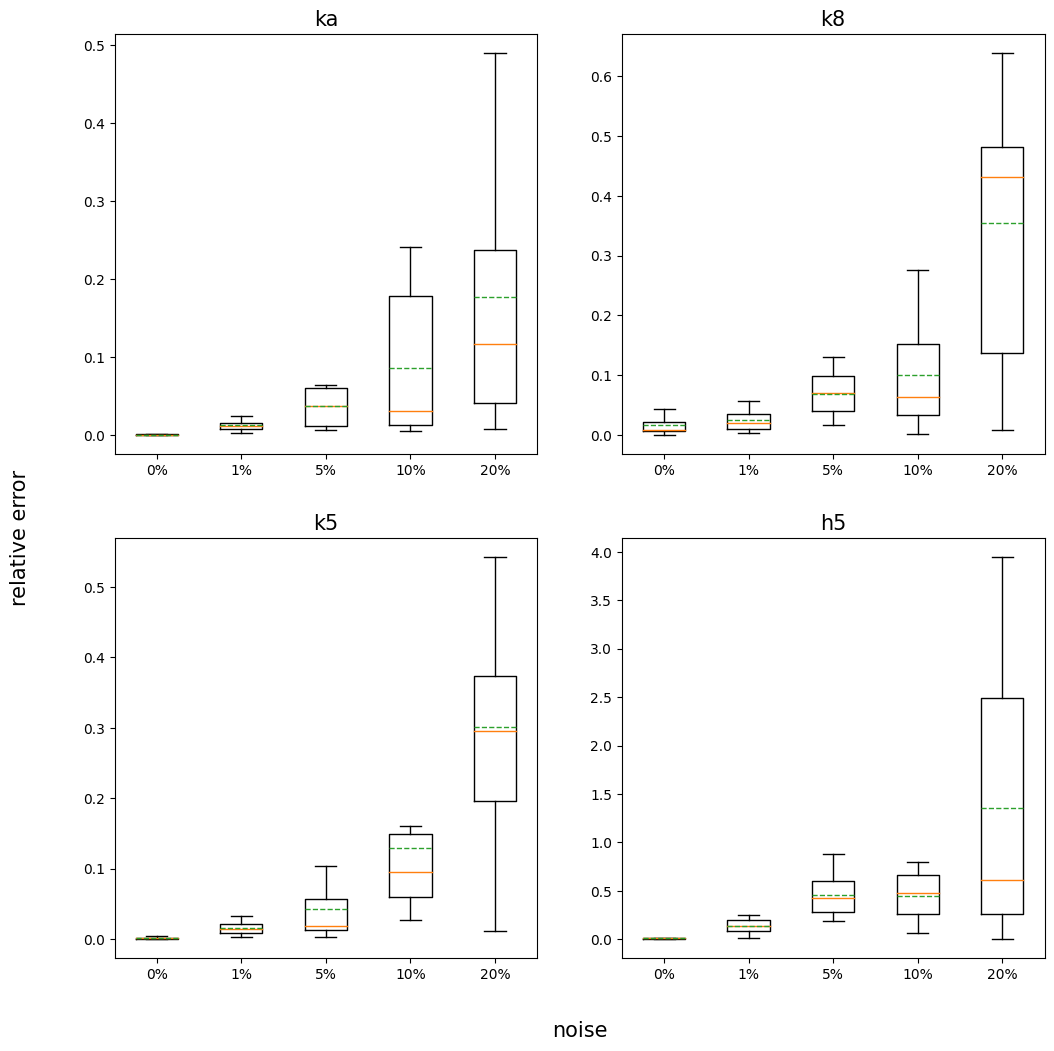

In [5]:
label=['0%', '1%', '5%', '10%', '20%']

ka_err = read_res(1.2, 0, "results/0501/")
plt.figure(figsize=(12, 12), dpi=100)
plt.subplot(2, 2, 1)
plt.boxplot(ka_err, labels=label[:6], showmeans=True, meanline=True, showfliers=False)
# plt.xlabel("noise scale")
# plt.ylabel("relative error")
plt.title("ka", size=15)

k8_err = read_res(0.00001, 1, "results/0501/")
plt.subplot(2, 2, 2)
plt.boxplot(k8_err, labels=label[:6], showmeans=True, meanline=True, showfliers=False)
# plt.xlabel("noise scale")
# plt.ylabel("relative error")
plt.title("k8", size=15)

k5_err = read_res(0.17, 2, "results/0501/")
sub = plt.subplot(2, 2, 3)
plt.boxplot(k5_err, labels=label[:6], showmeans=True, meanline=True, showfliers=False)
# plt.xlabel("noise scale")
plt.ylabel("relative error", fontsize=15)
plt.title("k5", size=15)
sub.yaxis.set_label_coords(-0.2, 1)

h5_err = read_res(0.31, 3, "results/0501/")
sub = plt.subplot(2, 2, 4)
plt.boxplot(h5_err, labels=label[:6], showmeans=True, meanline=True, showfliers=False)
plt.xlabel("noise", fontsize=15)
# plt.ylabel("relative error")
plt.title("h5", size=15)
sub.xaxis.set_label_coords(-0.1, -0.15)

# plt.suptitle("Error of unknown parameter inference with different data noise", size=20)
plt.show()

### Calculating statistical significance (p_value)

In [6]:
from scipy.stats import ttest_ind

In [7]:
ka_err

[array([1.14050000e-03, 3.14666667e-04, 2.54083333e-04, 9.50750000e-04,
        8.05916667e-04, 1.67916667e-04, 5.11750000e-04, 9.07833333e-04,
        4.38333333e-05, 5.36583333e-04]),
 array([0.0071085 , 0.01192258, 0.00895275, 0.01468558, 0.01480575,
        0.02373525, 0.00426458, 0.01147342, 0.00244642, 0.02196167]),
 array([0.00676833, 0.00669733, 0.06434192, 0.0575395 , 0.04284892,
        0.02785867, 0.03053442, 0.00669733, 0.06177342, 0.06248492]),
 array([0.00472333, 0.02340058, 0.00954625, 0.10320667, 0.21219378,
        0.02490483, 0.03529717, 0.24119279, 0.00501108, 0.20303608]),
 array([0.171014  , 0.4684652 , 0.03836758, 0.00707633, 0.04714342,
        0.48989004, 0.19069225, 0.25332   , 0.03969842, 0.06125233])]

In [12]:
for i in range(1,5):
    print(ttest_ind(ka_err[0], ka_err[i]).pvalue)

5.451139020365362e-05
0.0001796433554369619
0.01139747766261023
0.005865217900655962


In [13]:
for i in range(1,5):
    print(ttest_ind(k8_err[0], k8_err[i]).pvalue)

0.4071329084366201
0.0020686624399733496
0.019840046530086614
0.00020459305121472266


In [14]:
for i in range(1,5):
    print(ttest_ind(k5_err[0], k5_err[i]).pvalue)

0.00015452606487117982
0.019145662291625194
0.0012837829082732487
0.00014735138915522393


In [15]:
for i in range(1,5):
    print(ttest_ind(h5_err[0], h5_err[i]).pvalue)

7.869382170622871e-05
6.941154852825177e-06
4.474890472283341e-05
0.009086213087021646
